# Gradient Descent for Linear Regression (Single Variable)

In this notebook, we will implement gradient descent for linear regression with one variable. We'll cover the theory and then write Python code to train the model and visualize the results.

## Theory

The linear regression model is defined as:

$$\hat{y} = wx + b$$

where $w$ is the weight (slope) and $b$ is the bias (intercept).

The cost function (Mean Squared Error) is:

$$J(w, b) = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 = \frac{1}{n} \sum_{i=1}^n (y_i - (wx_i + b))^2$$

To minimize $J(w, b)$, we use gradient descent. The gradients are:

$$\frac{\partial J}{\partial w} = -\frac{2}{n} \sum_{i=1}^n x_i (y_i - (wx_i + b))$$

$$\frac{\partial J}{\partial b} = -\frac{2}{n} \sum_{i=1}^n (y_i - (wx_i + b))$$

Update equations:

$$w \leftarrow w - \alpha \frac{\partial J}{\partial w}$$

$$b \leftarrow b - \alpha \frac{\partial J}{\partial b}$$

where $\alpha$ is the learning rate.

## Python Implementation

Iteration 0: Cost 77.1803, w = 2.1920, b = 0.2200
Iteration 100: Cost 1.5375, w = 1.1400, b = 1.5757
Iteration 200: Cost 0.8553, w = 1.0655, b = 2.3884
Iteration 300: Cost 0.6380, w = 1.0235, b = 2.8471
Iteration 400: Cost 0.5688, w = 0.9998, b = 3.1060
Iteration 500: Cost 0.5468, w = 0.9864, b = 3.2521
Iteration 600: Cost 0.5398, w = 0.9788, b = 3.3345
Iteration 700: Cost 0.5375, w = 0.9746, b = 3.3811
Iteration 800: Cost 0.5368, w = 0.9722, b = 3.4073
Iteration 900: Cost 0.5366, w = 0.9708, b = 3.4222


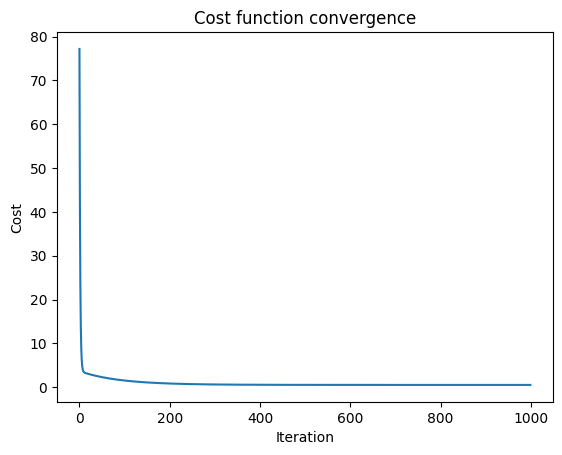


Final Model: y = 0.9701x + 3.4305


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cost function
def cost_function(x, y, w, b):
    n = len(y)
    return np.sum((y - (w*x + b))**2) / n

# Gradient Descent
def gradient_descent(x, y, w_init=0, b_init=0, learning_rate=0.01, iterations=1000):
    w, b = w_init, b_init
    n = len(y)
    cost_history = []

    for i in range(iterations):
        y_pred = w * x + b
        dw = (-2/n) * np.sum(x * (y - y_pred))
        db = (-2/n) * np.sum(y - y_pred)

        w -= learning_rate * dw
        b -= learning_rate * db

        cost = cost_function(x, y, w, b)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost:.4f}, w = {w:.4f}, b = {b:.4f}")

    return w, b, cost_history

# Example Data
# X = np.array([1,2,3,4,5])
# Y = np.array([3,5,7,9,11])

X=np.array([1,4,8,11,15]) # Number of signals
Y=np.array([4,7,12,15,17]) # Time taken to reach office

# Run Gradient Descent
w, b, costs = gradient_descent(X, Y, learning_rate=0.01, iterations=1000)

# Plotting cost history
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost function convergence')
plt.show()

# Print final model parameters
print(f"\nFinal Model: y = {w:.4f}x + {b:.4f}")

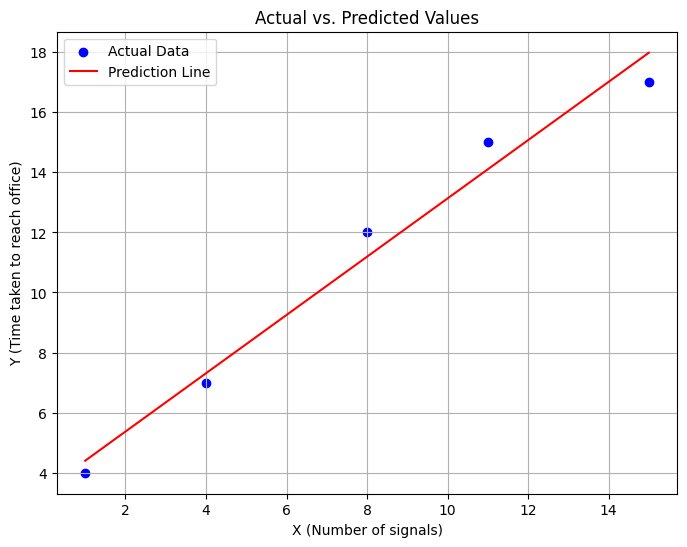

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, label='Actual Data', color='blue')
plt.plot(X, w * X + b, label='Prediction Line', color='red')
plt.xlabel('X (Number of signals)')
plt.ylabel('Y (Time taken to reach office)')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

# Reshape X for scikit-learn (it expects a 2D array)
X_reshaped = X.reshape(-1, 1)

# Create and train the scikit-learn model
skl_model = LinearRegression()
skl_model.fit(X_reshaped, Y)

# Get weights and bias from scikit-learn model
skl_w = skl_model.coef_[0]
skl_b = skl_model.intercept_

print("\n--- Scikit-learn Linear Regression ---")
print(f"Weight (w): {skl_w:.4f}")
print(f"Bias (b): {skl_b:.4f}")

print("\n--- Custom Gradient Descent Model ---")
print(f"Weight (w): {w:.4f}")
print(f"Bias (b): {b:.4f}")


--- Scikit-learn Linear Regression ---
Weight (w): 0.9691
Bias (b): 3.4414

--- Custom Gradient Descent Model ---
Weight (w): 0.9701
Bias (b): 3.4305


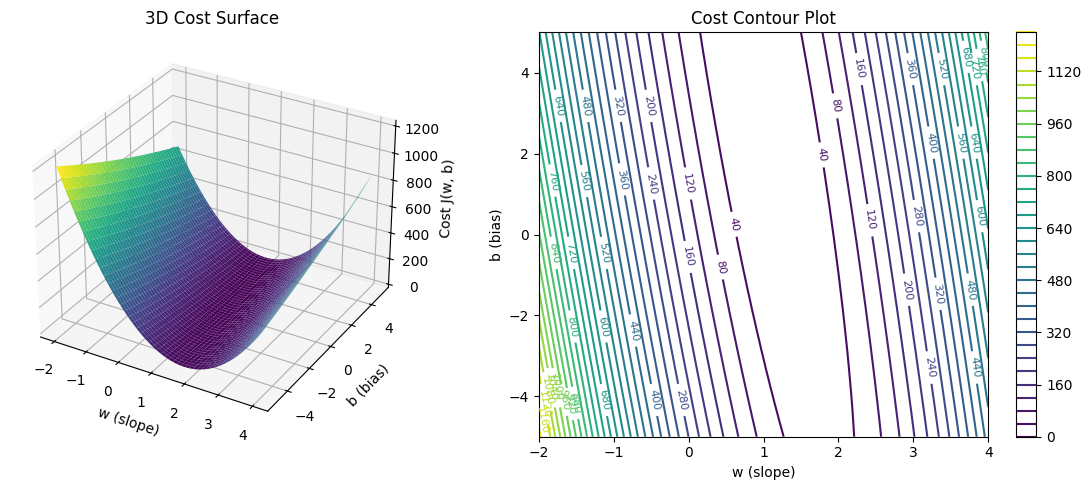

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data
X = np.array([1, 4, 8, 11, 15])
Y = np.array([4, 7, 12, 15, 17])
n = len(X)

# Cost function J(w, b)
def compute_cost(w, b):
    predictions = w * X + b
    return np.mean((Y - predictions)**2)

# Create grid of w and b values
w_vals = np.linspace(-2, 4, 100)
b_vals = np.linspace(-5, 5, 100)

W, B = np.meshgrid(w_vals, b_vals)

# Compute cost for each pair (w, b)
J_vals = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        J_vals[i, j] = compute_cost(W[i, j], B[i, j])

# 3D Surface Plot
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(W, B, J_vals, cmap='viridis', edgecolor='none')
ax.set_xlabel("w (slope)")
ax.set_ylabel("b (bias)")
ax.set_zlabel("Cost J(w, b)")
ax.set_title("3D Cost Surface")

# Contour Plot (Top View)
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contour(W, B, J_vals, 30, cmap='viridis')
ax2.clabel(contour, inline=True, fontsize=8)
ax2.set_xlabel("w (slope)")
ax2.set_ylabel("b (bias)")
ax2.set_title("Cost Contour Plot")
plt.colorbar(contour, ax=ax2)

plt.tight_layout()
plt.show()


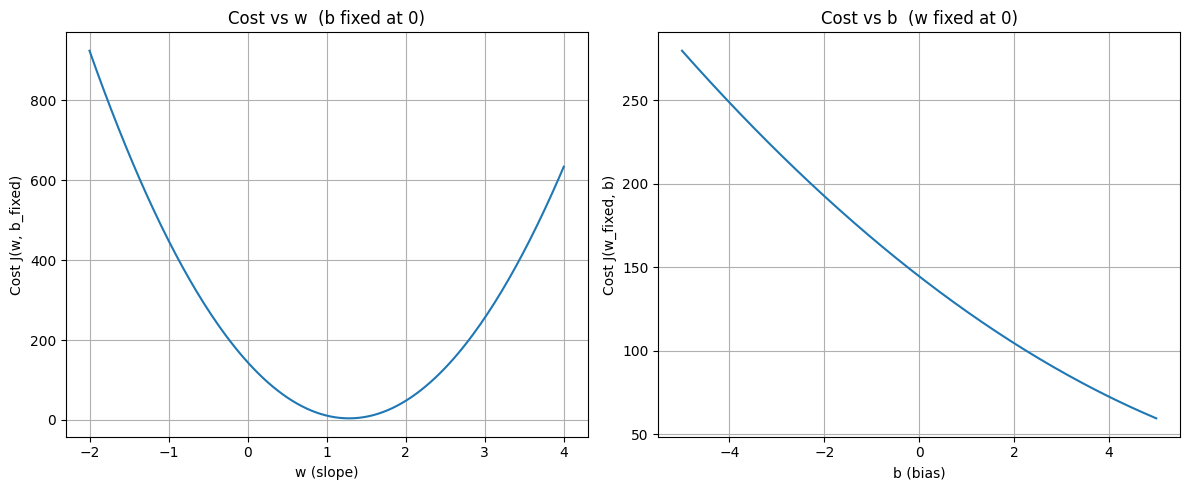

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data
X = np.array([1, 4, 8, 11, 15])
Y = np.array([4, 7, 12, 15, 17])
n = len(X)

# Cost function J(w, b)
def compute_cost(w, b):
    predictions = w * X + b
    return np.mean((Y - predictions)**2)

# Fix values for the slice plots
b_fixed = 0     # you can change this
w_fixed = 0    # you can change this

# Ranges for w and b
w_vals = np.linspace(-2, 4, 200)
b_vals = np.linspace(-5, 5, 200)

# Compute cost slices
J_w_slice = np.array([compute_cost(w, b_fixed) for w in w_vals])
J_b_slice = np.array([compute_cost(w_fixed, b) for b in b_vals])

# Plot cost vs w
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(w_vals, J_w_slice)
plt.xlabel("w (slope)")
plt.ylabel("Cost J(w, b_fixed)")
plt.title(f"Cost vs w  (b fixed at {b_fixed})")
plt.grid(True)

# Plot cost vs b
plt.subplot(1,2,2)
plt.plot(b_vals, J_b_slice)
plt.xlabel("b (bias)")
plt.ylabel("Cost J(w_fixed, b)")
plt.title(f"Cost vs b  (w fixed at {w_fixed})")
plt.grid(True)

plt.tight_layout()
plt.show()
